Для кожної з домашніх робіт попереднього модуля:

Hw2.1.ipynb

Hw2.2.ipynb

Hw2.3.ipynb

додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# $\color{blue}{1. \ Hw2.1.ipynb}$
$\color{blue}{Коефіцієнт \ народжуваності \ в \ регіонах \ України}$

In [10]:
url = r'http://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

In [11]:
df_origin1 = pd.read_html(url,
                  match='Коефіцієнт народжуваності в регіонах України',
                  decimal=',',
                  thousands='.')[0]
df1 = df_origin1.copy()
df1.replace({'—': np.nan}, inplace=True) # Заміна у таблиці значення "—" на значення NaN
df1 = df1.astype({'2014': 'float', '2019': 'float'}) # Заміна типів нечислових колонок на числові
df1.drop(27, axis=0, inplace=True) # Видалення з таблиці данних по всій країні
df1.fillna(df1.mean(numeric_only=True).round(decimals=1), inplace=True) # Заміна відсутніх данних в стовпцях середніми значеннями цих стовпців
df1.index = df1['Регіон'] # перевизначення індексу на стовпець 'Регіон'
df1.drop('Регіон', axis=1, inplace=True) # видалення стовпця 'Регіон'

In [12]:
df1

,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0
Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8


## $\color{red}{1. \ line \ plot}$

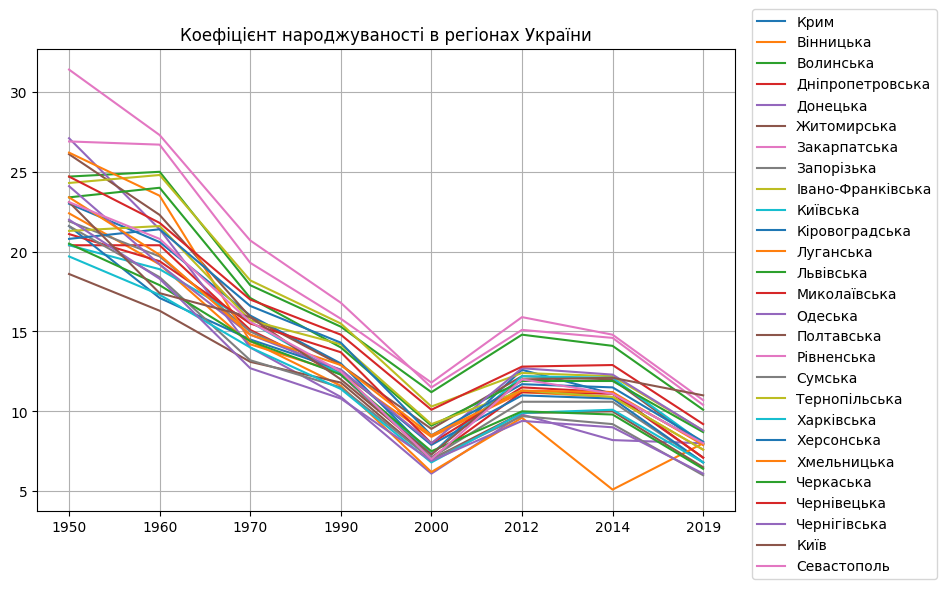

In [13]:
x1 = df1.columns
y1 = df1.values.T
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(x1, y1)
ax.legend(df1.index, loc=1, bbox_to_anchor=(0.3, 1.1, 1, 0.))
ax.set_title('Коефіцієнт народжуваності в регіонах України')
ax.grid(True)

## $\color{red}{2. \ bar \ plot}$

Text(0.5, 1.0, 'Коефіцієнт народжуваності в регіонах України у 2012 році')

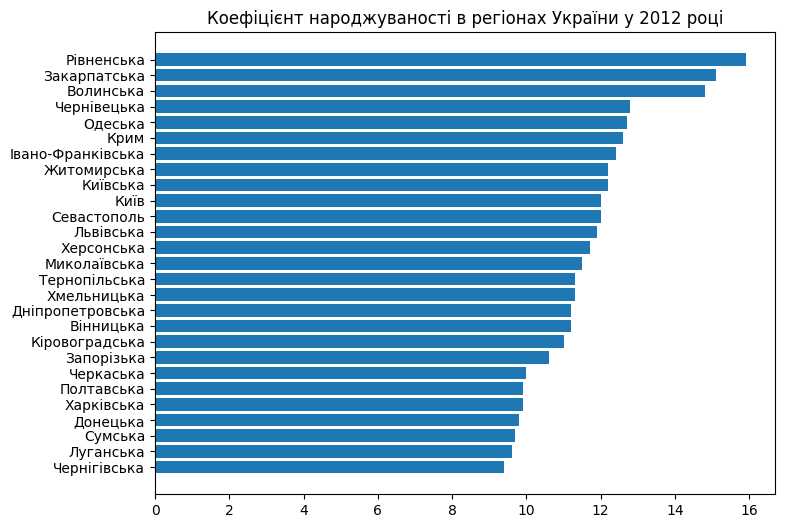

In [14]:
df1_2 = df1['2012'].sort_values()
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df1_2.index, df1_2.values)
ax.set_title('Коефіцієнт народжуваності в регіонах України у 2012 році')

## $\color{red}{3. \ scatter \ plot}$

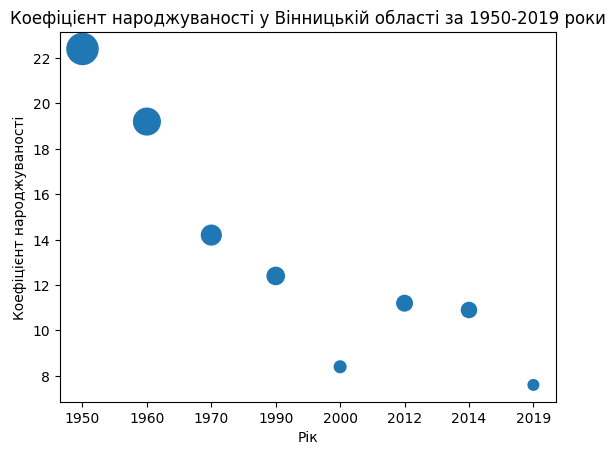

In [15]:
years = df1.columns
birth_rates = df1.loc['Вінницька']
fig, ax = plt.subplots()
ax.set_xlabel('Рік')
ax.set_ylabel('Коефіцієнт народжуваності')
ax.set_title('Коефіцієнт народжуваності у Вінницькій області за 1950-2019 роки')
ax.scatter(years, birth_rates, s=birth_rates**2)

# $\color{blue}{2. \ Hw2.2.ipynb}$
$\color{blue}{2017 \_jun\_final.csv.\ Файл \ містить \ результати \ опитування \ розробників \ у \ червні\ 2017 \ року}$

In [16]:
df_origin2 = pd.read_csv('2017_jun_final.csv')
df2 = df_origin2.copy()
df2

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,False,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


## $\color{red}{1. \ pie \ plot}$

In [17]:
df2_1 = df2.rename(columns={"Язык.программирования": 'language'}).language
df2_1.dropna(axis=0, inplace=True)
df2_1 = pd.DataFrame(df2_1)

In [18]:
df2_1 = df2_1.groupby('language').agg({'language':'count'})

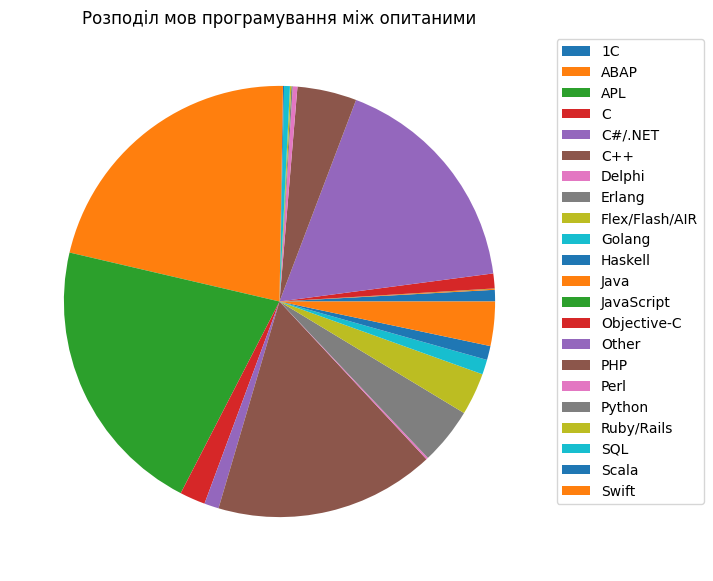

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df2_1['language'])
ax.set_title('Розподіл мов програмування між опитаними')
ax.legend(df2_1.index, loc=1, bbox_to_anchor=(0.3, 1., 1, 0.))

## $\color{red}{2. \ relplot}$

In [20]:
df2_2 = df2[['Должность', 'Язык.программирования', 'Зарплата.в.месяц']]
df2_2 = df2_2.rename(columns={'Должность': 'position', 
                              'Язык.программирования': 'language', 
                              'Зарплата.в.месяц': 'salary'})
df2_2.dropna(axis=0, inplace=True)
df2_2 = df2_2.groupby(['language', 'position']).agg({'salary':'mean'})

<ipython-input-21-959ad5ef7348>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.relplot(x='position', y="language", size="salary", alpha=.5,


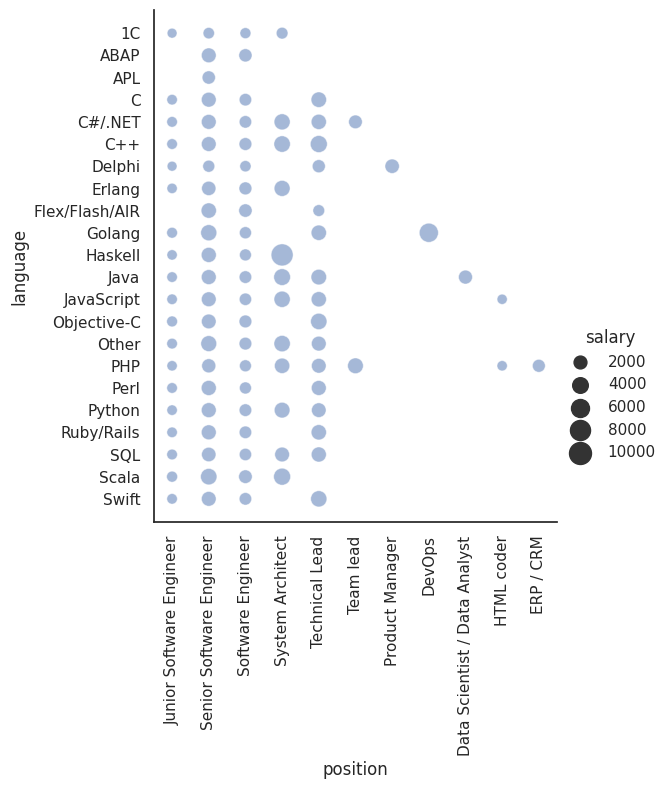

In [21]:
import seaborn as sns
sns.set_theme(style="white")
ax = sns.relplot(x='position', y="language", size="salary", alpha=.5, 
                 sizes=(50, 250), palette="muted",
                 height=6, data=df2_2)
ax.set_xticklabels(rotation=90)

## $\color{red}{3. \ histogram}$

Text(0.5, 1.0, 'Розполіл зарплати')

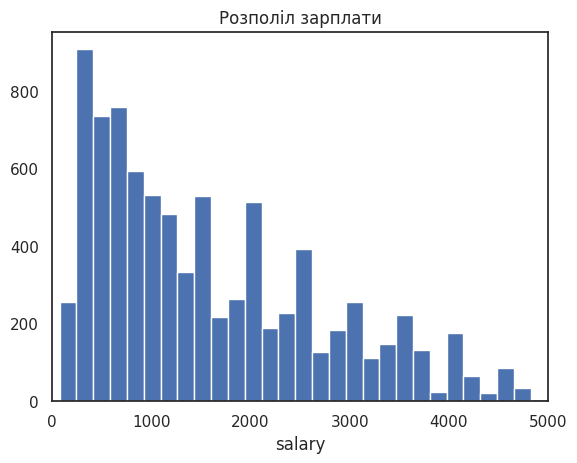

In [22]:
fig, ax = plt.subplots()

ax.hist(df2[['salary']], bins=200)
ax.set(xlim=(0, 5000))
ax.set_xlabel('salary')
ax.set_title('Розполіл зарплати')

# $\color{blue}{3. \ Hw2.3.ipynb}$
$\color{blue}{Аналіз \ датасету \ c \ Kaggle.com}$

In [23]:
df3 = pd.read_csv('bestsellers with categories.csv')
df3.columns = ['name', 'author', 'rating', 'reviews', 'price', 'year', 'genre']
df3

,name,author,rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


## $\color{red}{1. \ relplot}$

Text(0.5, 1.0, 'Відношення ціни та рейтингу')

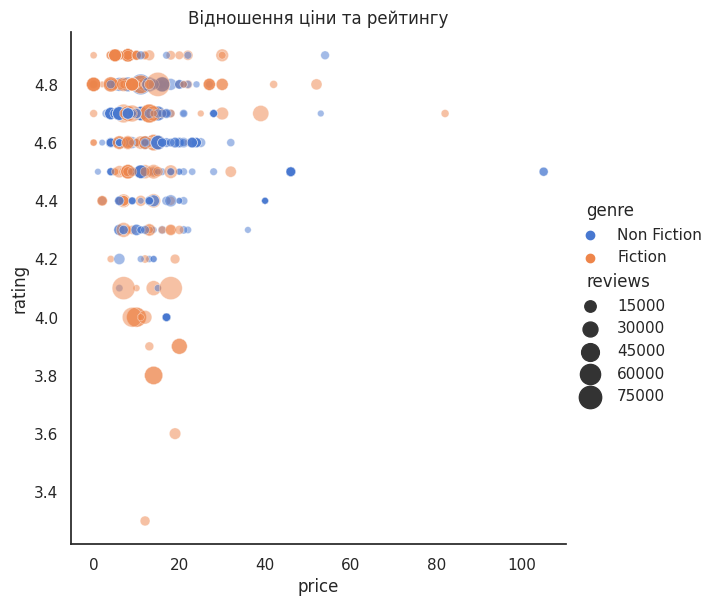

In [24]:
sns.set_theme(style="white")
ax = sns.relplot(x='price', y="rating", size="reviews",
            sizes=(20, 300), alpha=.5, palette="muted",
            hue='genre', height=6, data=df3)
plt.title('Відношення ціни та рейтингу')
# ax.set(xlim=(0, 30))
# ax.set(ylim=(3.9, 5))

## $\color{red}{2. \ pairplot}$

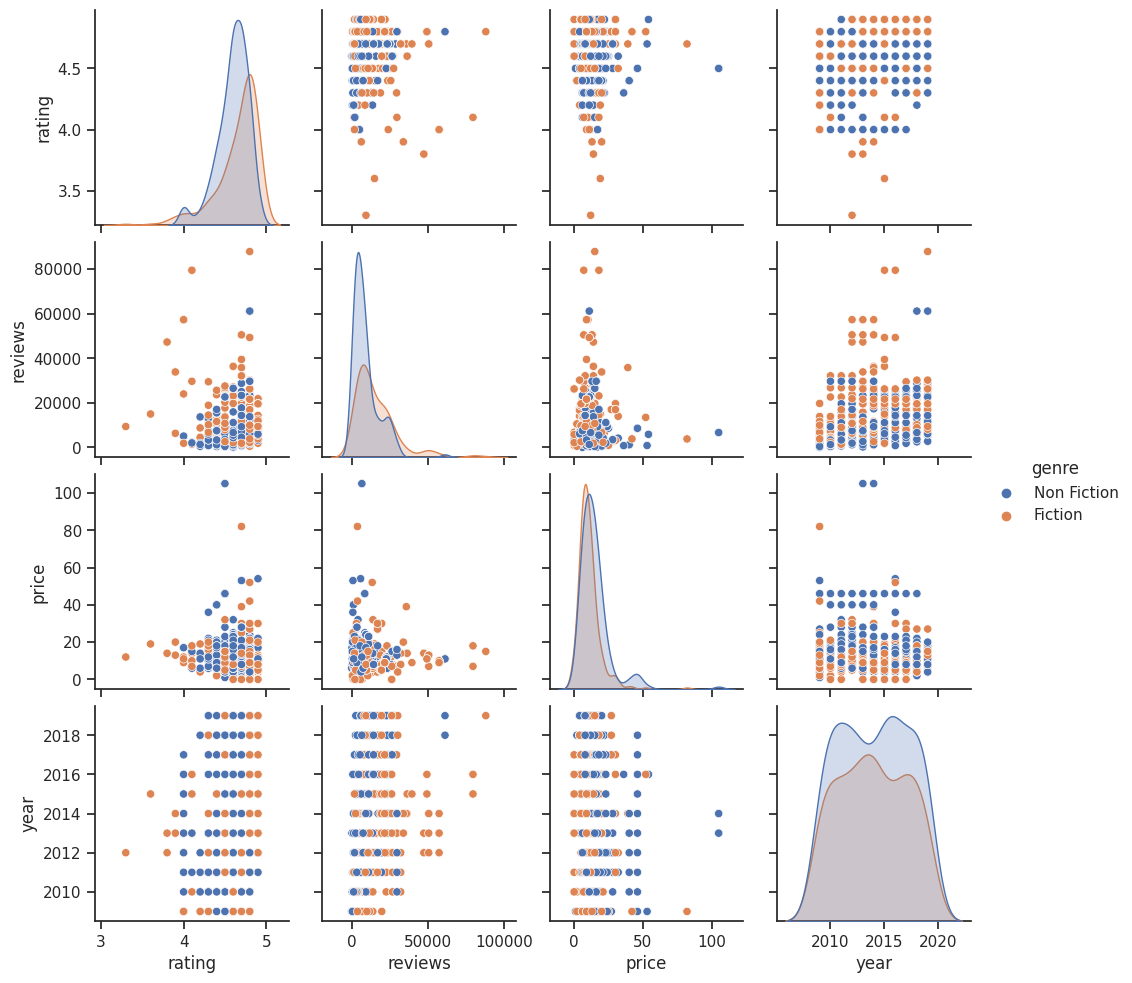

In [25]:
sns.set_theme(style="ticks")

sns.pairplot(df3, hue="genre")

## $\color{red}{3. \ displot}$

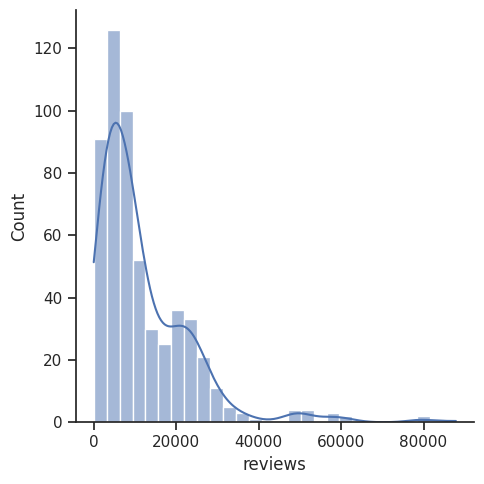

In [26]:
sns.displot(data=df3, x="reviews", kde=True)